In [1]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()




Saving WineQT - WineQT.csv to WineQT - WineQT.csv


..................................................................................

First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

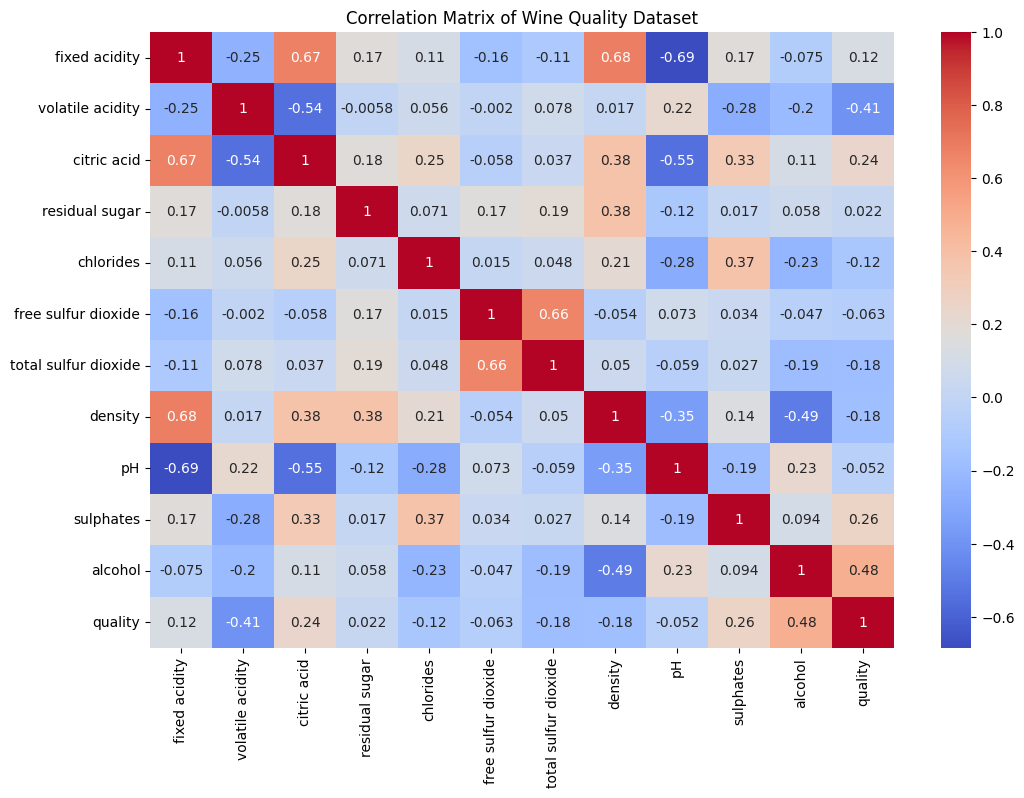


Feature importances:
                      importance
alcohol                 0.146463
sulphates               0.118891
volatile acidity        0.103711
total sulfur dioxide    0.102482
density                 0.086800
fixed acidity           0.077648
citric acid             0.077051
pH                      0.077003
chlorides               0.075989
residual sugar          0.069545
free sulfur dioxide     0.064418

Classification Results:
Logistic Regression: Mean Accuracy = 0.6036, Std Dev = 0.0272
Decision Tree: Mean Accuracy = 0.5853, Std Dev = 0.0264
Random Forest: Mean Accuracy = 0.6684, Std Dev = 0.0227
SVM: Mean Accuracy = 0.6308, Std Dev = 0.0215
Gradient Boosting: Mean Accuracy = 0.6395, Std Dev = 0.0404

Regression Results:
Linear Regression: Mean R2 Score = 0.3469, Std Dev = 0.0795
Decision Tree: Mean R2 Score = 0.0133, Std Dev = 0.1390
Random Forest: Mean R2 Score = 0.4631, Std Dev = 0.0508
Gradient Boosting: Mean R2 Score = 0.4018, Std Dev = 0.0768


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
data = pd.read_csv("WineQT - WineQT.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Normalize/standardize the features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.iloc[:, :-1]), columns=data.columns[:-1])
data_scaled['quality'] = data['quality']

# Display the first few rows of the scaled dataset
print("\nFirst few rows of the scaled dataset:")
print(data_scaled.head())

# Compute the correlation matrix
corr_matrix = data_scaled.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()

# Separate features and target variable
X = data_scaled.drop(columns='quality')
y = data_scaled['quality']

# Train a Random Forest Classifier to determine feature importance
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

print("\nFeature importances:")
print(feature_importances)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

# Classification Models
classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Regression Models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluate each classification model
classification_results = {}
for name, model in classification_models.items():
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    classification_results[name] = np.mean(cv_results), np.std(cv_results)

# Evaluate each regression model
regression_results = {}
for name, model in regression_models.items():
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    regression_results[name] = np.mean(cv_results), np.std(cv_results)

print("\nClassification Results:")
for name, (mean, std) in classification_results.items():
    print(f"{name}: Mean Accuracy = {mean:.4f}, Std Dev = {std:.4f}")

print("\nRegression Results:")
for name, (mean, std) in regression_results.items():
    print(f"{name}: Mean R2 Score = {mean:.4f}, Std Dev = {std:.4f}")


**Parameter Tuning for Classification**

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [10,20,30,60,90,100,],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None,5, 10,15, 20, 30,50],
    'min_samples_split': [2, 5,7,9, 10,13],
    'min_samples_leaf': [1, 2, 4,6,8],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Fitting 3 folds for each of 5040 candidates, totalling 15120 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 9, 'n_estimators': 20}
Best accuracy:  0.6019247594050744


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


# ** Parameter Tuning for Regression**

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [10,20,30,60,90,100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None,5, 10,15, 20, 30,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)


Fitting 3 folds for each of 1512 candidates, totalling 4536 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 60}
Best R2 score:  0.37106288086153727


# **Performance Reporting for Classification**

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Use the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Initialize the Random Forest Classifier with the best parameters
rf_classifier = RandomForestClassifier(**best_params)

# Perform k-fold cross-validation
cv_results = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='accuracy')
print(f"Final Mean Accuracy: {np.mean(cv_results):.4f}, Std Dev: {np.std(cv_results):.4f}")


Final Mean Accuracy: 0.6368, Std Dev: 0.0365


# **Performance Reporting for Regression**

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Use the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Initialize the Random Forest Regressor with the best parameters
rf_regressor = RandomForestRegressor(**best_params)

# Perform k-fold cross-validation
cv_results = cross_val_score(rf_regressor, X, y, cv=kfold, scoring='r2')
print(f"Final Mean R2 Score: {np.mean(cv_results):.4f}, Std Dev: {np.std(cv_results):.4f}")


Final Mean R2 Score: 0.4334, Std Dev: 0.0445
